PYTORCH WORKFLOW

In [1]:
covering={1:"data(prepare and load)",
          2:"build model",
          3:"fitting the model to data(training)",
          4:"making predictions and evaluating a model",
          5:"saving and reloading trained model",
          6:"putting it all together"}
covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evaluating a model',
 5: 'saving and reloading trained model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt


###1.Data (preparing and loading)

In [3]:
#create known parameters
weight=0.7
bias=0.3

#create data
start=0
end=1
step=0.02
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight * X + bias
X[:10], y[:10], len(X), len(y)


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [4]:
#splitting data into training and test set
#create a train/test split
train_split=int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
#visualizing the data
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  ###plot training data in blue
  plt.scatter(train_data,train_labels, c="blue",s=4, label="Training data")
  ###plot test data in green
  plt.scatter(test_data,test_labels,c="green", s=4, label="Testting data")
  ##are there predictions?
  if predictions is not None:
    #plot the predictions if they exist
    plt.scatter(test_data,predictions,c="r",label="Predictions")

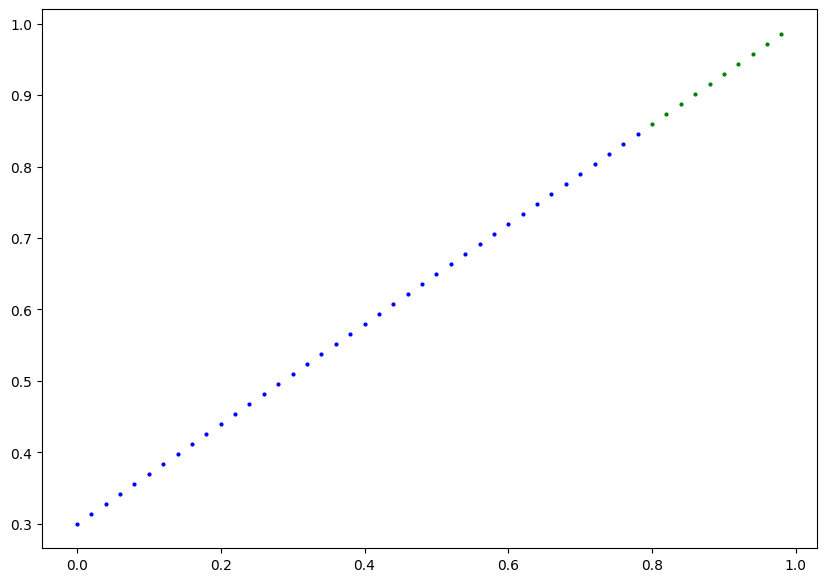

In [6]:
plot_predictions()

###2.Build Model

start with random values(weight and bias)

look at training data and adjust the random values to better represent(or get closer to) the ideal values(the weight and bias we hard coded)

through two main algorithms:
1. Gradient descent
2. Back propagation

PyTorch MODEL BUILDING ESSENTIALS
torch.nn - contains all of the buildings for computational graphs(neural networks)

nn.Parameter -  what parameters shhould our model try and learn

torch.nn.Module - base class for all neural network models

torch.optim - optimisers to help the gradient descent

def dorward() -  all nn.Module subclass require you to override the forward function to fit your model



In [7]:
#create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter (torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float))
    #forward method to define the computation in the model
  def forward(self, x: torch.tensor) -> torch.tensor: #"x" is the input data
    return self.weights * x + self.bias

###checking the contents of our model
we can check the model by using .parameters()

In [8]:
#create a random  seed
torch.manual_seed(42)
#create an instance of the model(this is a subclass of nn.Module)
model_0=LinearRegressionModel()
#check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Making prediction using torch.inference_mode

Checking how well it predicts y_test based on X_test
data is passed through the forward method

In [10]:
#Make predictions with model
with torch.inference_mode():
  y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [11]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

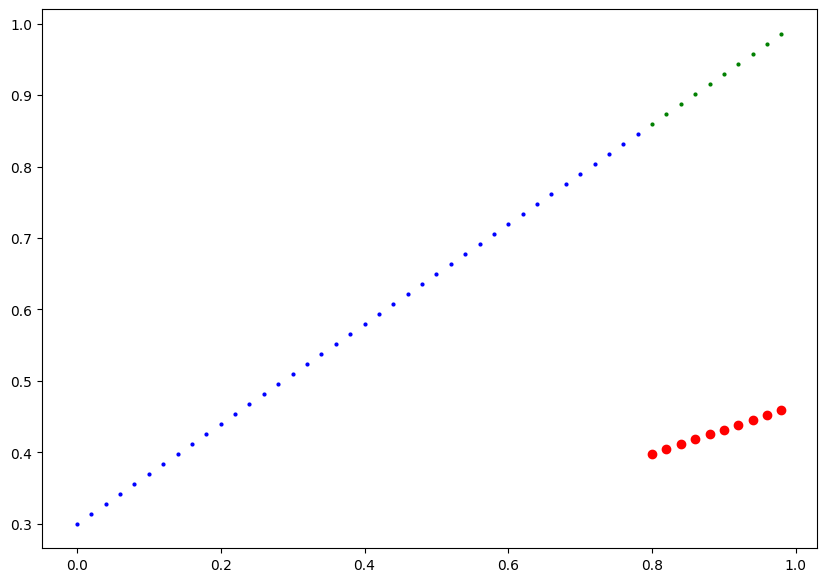

In [12]:
plot_predictions(predictions=y_preds)

###3. Train Model
training is for  a model to move from some unknown parameters to some known parameters

this is to represent the data in a better way

one way to measure how wrong your models are is to use a loss/cost function

optimizer:takes into account the loss of a model and adjusts the model's parameters(eg. weight and bias) to improve the loss functions

Pytorch needs:
1. a training loop
2. a testing loop

In [13]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup an optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

###Building a training and Testing Loop

things needed in a training loop:

1.Loop through the data

2.Forward pass(involves data moving through forward functions) - also called forward propagation

3.Calculate the loss(compare forward  pass predictions to ground truth labels)

4.Optimizer zero grad

5.Loss backward - move backwards through the network to calculate the gradients of each of the parameters
of the model with respect to the loss -back propagation

6.Optimizer step- use the optimizer to adjust the model's parameters to try and improve the loss(gradient descent)


In [14]:
torch.manual_seed(42)
#an epoch is one loop through the data
epochs=200
#track differnt values
epoch_count=[]
loss_values=[]
test_loss_values=[]
#0.Loop through the data
for epoch in range(epochs):
  #set the model to training mode
  model_0.train()
  #forward pass
  y_pred=model_0(X_train)
  #Calculate the loss
  loss=loss_fn(y_pred,y_train)
  print(f"Loss: {loss}")
  #optimizer zero grad
  optimizer.zero_grad()
  #perform back propagation on the loss with respect to the parameters of the model
  loss.backward()
  #step the optimizer(perform gradient descent)
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    #do the forward pass
    test_pred = model_0(X_test)
    #calculate the test loss
    test_loss=loss_fn(test_pred,y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
      #print model state_dict()
      print(model_0.state_dict())

Loss: 0.31288138031959534
Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: 0.3013603389263153
Loss: 0.28983935713768005
Loss: 0.2783183455467224
Loss: 0.26679736375808716
Loss: 0.2552763521671295
Loss: 0.24375534057617188
Loss: 0.23223432898521423
Loss: 0.22071333229541779
Loss: 0.20919232070446014
Loss: 0.1976713240146637
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: 0.18615034222602844
Loss: 0.1746293306350708
Loss: 0.16310831904411316
Loss: 0.1515873372554779
Loss: 0.14006635546684265
Loss: 0.1285453587770462
Loss: 0.11702437698841095
Loss: 0.1060912236571312
Loss: 0.09681284427642822
Loss: 0.08908725529909134
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Loss: 0.08227583020925522
Loss: 0

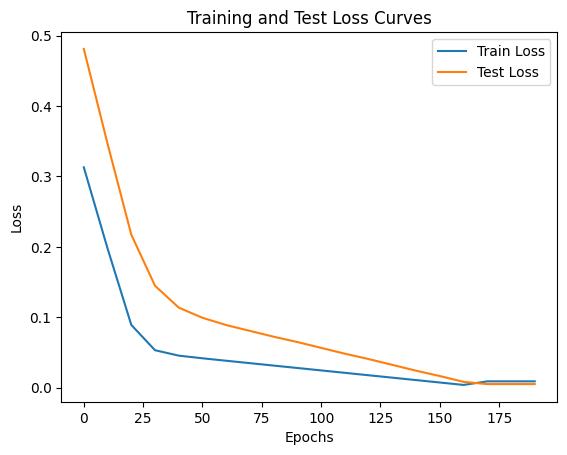

In [15]:
import numpy as np

#plot the loss curves
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train Loss")
plt.plot(epoch_count,test_loss_values,label="Test Loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [16]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

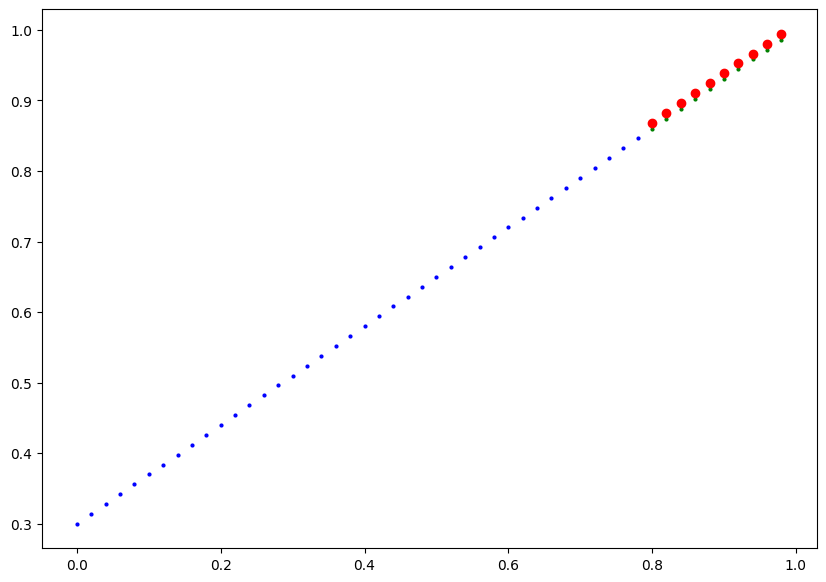

In [17]:
plot_predictions(predictions=y_preds_new)

Saving a Model in PyTorch

1.torch.save() - allows you to save python object in python's pickle format

2.torch.load() - allows you load a saved pytorch object

3.torch.nn.Module.load_state_dict() - allows you to load a model's saved state dictionary

In [18]:
# saving the model
from pathlib import Path
#1.create model directory
MODEL_PATH=Path("model")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
#2. Create model save path
MODEL_NAME="01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
#3.Save the model state_dict
print(f"Saaving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saaving model to: model/01_pytorch_workflow_model_0.pth


In [19]:
!ls -l model

total 4
-rw-r--r-- 1 root root 1680 Apr 10 09:25 01_pytorch_workflow_model_0.pth


In [20]:
#loading the model
#Since we've now got a saved model state_dict() at models/01_pytorch_workflow_model_0.pth we can now load it in using torch.nn.Module.load_state_dict(torch.load(f)) where f is the filepath of our saved model state_dict().

#Instantiate a new instance of the model class
loaded_model_0=LinearRegressionModel()
#load the saved state_dict of model_0 into the new instance of the model
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [21]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [22]:
#Make some predictions
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds= loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [23]:
#compare loaded model preds with original model preds
y_preds_new==loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

##Putting it all together

In [24]:
import torch
from torch import nn
import matplotlib.pyplot as plt

device= "cuda" if torch.cuda.is_available() else "cpu"
print(device)



cuda


In [25]:
# CREATE DATA USING LinearRegression formula y=weight*X + bias
weight=0.7
bias=0.3
#create range values
start=0
end=1
step=0.02
#create X and y (features and labels)
X=torch.arange(start,end,step).unsqueeze(dim=1)
y= weight*X + bias
#X[:10],y[:10]
#split data
train_split = int(0.8 * len(X) )
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)


(40, 40, 10, 10)

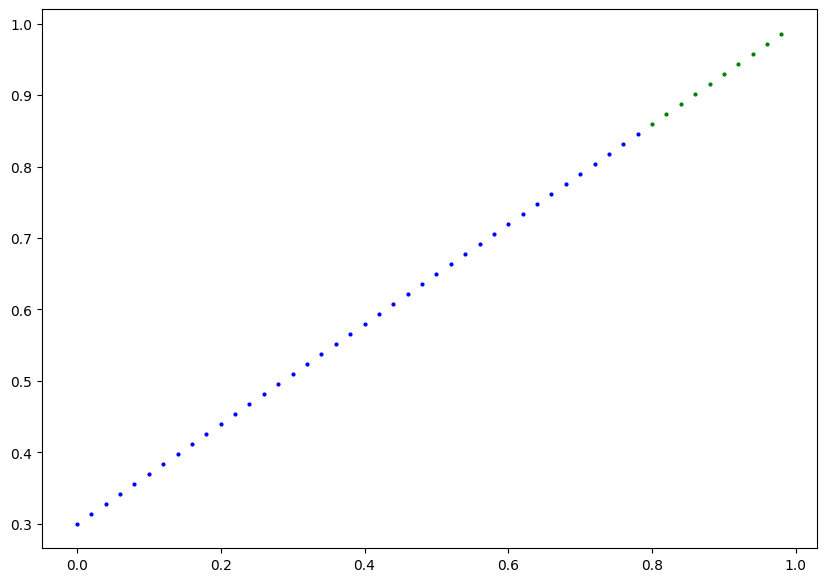

In [26]:
#PLOT the DATA
plot_predictions(X_train,y_train,X_test,y_test)

In [27]:
##Buiding a Pytorch Linear Model
class LinearRegressionModel_t(nn.Module):
  def __init__(self):
    super().__init__()
    #use nn.linear() for creating model parameters
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self, x:torch.tensor)-> torch.tensor:
    return self.linear_layer(x)
#create a random seed and check model
torch.manual_seed(42)
model_00=LinearRegressionModel_t()
print(model_00)
print(list(model_00.parameters()))
model_00.state_dict()
# model_00.train()

LinearRegressionModel_t(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [28]:
#set model to use target device
model_00.to(device)
next(model_00.parameters()).device

device(type='cuda', index=0)

In [29]:
#Training the Model
#1.loss function
loss_fn=nn.L1Loss()
(loss_fn)
# 2.Optimizer
optimizer=torch.optim.SGD(params=model_00.parameters(),
                          lr=0.01)
#3.Create a training loop
torch.manual_seed(42)
#put data on device
X_train=X_train.to(device)
X_train
y_train=y_train.to(device)
X_test=X_test.to(device)
y_test=y_test.to(device)
epochs=200
for epoch in range(epochs):
  model_00.train()
  y_pred=model_00(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #Testing
  model_00.eval()
  with torch.inference_mode():
    test_pred=model_00(X_test)
    test_loss=loss_fn(test_pred,y_test)
  #print what's happening
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [30]:
model_00.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [31]:
#saving and loading trained model
#1. create models directory
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#2. create model save path
MODEL_NAME='01_pytorch_workflow_model_1.pth'
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#3. save model state_dict
torch.save(obj=model_00.state_dict(),
           f=MODEL_SAVE_PATH)

In [33]:
#load pytorch model
loaded_model_1=LinearRegressionModel_t()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_1.to(device)

LinearRegressionModel_t(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [34]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)